In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Read suicide data into pandas dataframe

master=pd.read_csv('master.csv')

# Data info
master.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
bad_countries = ['Dominica',
'Grenada',
'Jamaica',
'Kiribati',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and Grenadines',
'San Marino',
'Seychelles',
'Albania',
'Antigua and Barbuda',
'Armenia',
'Aruba',
'Azerbaijan',
'Bahamas',
'Bahrain',
'Barbados',
'Belize',
'Bulgaria',
'Costa Rica',
'Cyprus',
'Macau',
'Maldives',
'Malta',
'Mongolia',
'Monte Negro',
'Nicaragua',
'Oman']



In [72]:
master_good = master[~master['country'].isin(bad_countries)]
master_good

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [6]:
average_suicides = master_good.groupby('country')[['suicides/100k pop']].mean()
average_suicides

,suicides/100k pop
country,
Argentina,10.469328
Australia,12.992806
Austria,23.759764
Belarus,31.075913
Belgium,21.237903
...,...
United Arab Emirates,1.317917
United Kingdom,7.502473
United States,13.819812


In [73]:
# Read weather data into pandas dataframe

weather_df=pd.read_csv('2013_average_country_temperature.csv')
weather_df.columns = ['country', 'max', 'min', 'aver']
# Data info
weather_df

,country,max,min,aver
0,Afghanistan,10.477778,-2.900000,18.244821
1,Albania,22.017818,9.788066,15.785479
2,Algeria,25.225117,12.820783,19.352357
3,American Samoa [United States],30.213425,25.326575,27.520727
4,Antarctica,-6.335076,-11.712247,-18.504513
...,...,...,...,...
177,Venezuela,33.084566,22.695485,27.527694
178,Vietnam,28.777332,22.203085,25.150587
179,Wallis and Futuna [France],30.427538,24.859155,27.304390
180,Zambia,30.855072,14.300000,25.610056


In [74]:
#Make suicides df for 2013 data only
suicide_2013 = master_good[master_good['year']==2013]
suicide_2013

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
924,Argentina,2013,male,75+ years,168,699046,24.03,Argentina2013,0.833,"552,025,140,252",14206,Silent
925,Argentina,2013,male,15-24 years,696,3486661,19.96,Argentina2013,0.833,"552,025,140,252",14206,Millenials
926,Argentina,2013,male,25-34 years,499,3271373,15.25,Argentina2013,0.833,"552,025,140,252",14206,Millenials
927,Argentina,2013,male,55-74 years,398,2894129,13.75,Argentina2013,0.833,"552,025,140,252",14206,Boomers
928,Argentina,2013,male,35-54 years,604,4950850,12.20,Argentina2013,0.833,"552,025,140,252",14206,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27803,Uzbekistan,2013,female,35-54 years,99,3547895,2.79,Uzbekistan2013,0.672,"57,690,453,461",2150,Generation X
27804,Uzbekistan,2013,female,75+ years,8,345180,2.32,Uzbekistan2013,0.672,"57,690,453,461",2150,Silent
27805,Uzbekistan,2013,male,5-14 years,61,2720938,2.24,Uzbekistan2013,0.672,"57,690,453,461",2150,Generation Z
27806,Uzbekistan,2013,female,55-74 years,21,1356298,1.55,Uzbekistan2013,0.672,"57,690,453,461",2150,Boomers


In [76]:
#Joining the weather dataframe with the suicide dataframe based on country names
weather_df['country']=weather_df['country'].str.strip()
df=pd.merge(suicide_2013, right=weather_df, how='left', left_on='country', right_on='country')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 779
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             780 non-null    object 
 1   year                780 non-null    int64  
 2   sex                 780 non-null    object 
 3   age                 780 non-null    object 
 4   suicides_no         780 non-null    int64  
 5   population          780 non-null    int64  
 6   suicides/100k pop   780 non-null    float64
 7   country-year        780 non-null    object 
 8   HDI for year        744 non-null    float64
 9    gdp_for_year ($)   780 non-null    object 
 10  gdp_per_capita ($)  780 non-null    int64  
 11  generation          780 non-null    object 
 12  max                 720 non-null    float64
 13  min                 720 non-null    float64
 14  aver                720 non-null    float64
dtypes: float64(5), int64(4), object(6)
memory usage: 97.5+ KB

In [77]:
#find countries that didn't get filled in the join
countries = df[df['aver'].isna()]['country'].unique()
countries

array(['Guatemala', 'Panama', 'Puerto Rico', 'Republic of Korea',
       'Russian Federation'], dtype=object)

In [78]:
#Find if the countries in countries are in the weather_df
weather_df[(weather_df['country'].str.contains('Korea') | 
          weather_df['country'].str.contains('Russia') |
            weather_df['country'].str.contains('Panama') |
            weather_df['country'].str.contains('Rico') |
            weather_df['country'].str.contains('Gaute'))]

,country,max,min,aver
90,Korea North,14.204944,3.410638,8.693678
138,Russia,4.995262,-3.468449,0.835698
151,South Korea,18.098828,9.537427,13.699153


In [79]:
#Gautemala, Puerto Rico and Panama are not in the weather dataframe.
#Renaming country names in suicide_2013 to be the same as the weather_df.

suicide_2013.replace('Republic of Korea','South Korea', inplace=True)
suicide_2013.replace('Russian Federation','Russia', inplace=True)

#Join again and drop the nas
df=pd.merge(suicide_2013, right=weather_df, how='left', left_on='country', right_on='country')
df.dropna(subset=['aver'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 779
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             744 non-null    object 
 1   year                744 non-null    int64  
 2   sex                 744 non-null    object 
 3   age                 744 non-null    object 
 4   suicides_no         744 non-null    int64  
 5   population          744 non-null    int64  
 6   suicides/100k pop   744 non-null    float64
 7   country-year        744 non-null    object 
 8   HDI for year        720 non-null    float64
 9    gdp_for_year ($)   744 non-null    object 
 10  gdp_per_capita ($)  744 non-null    int64  
 11  generation          744 non-null    object 
 12  max                 744 non-null    float64
 13  min                 744 non-null    float64
 14  aver                744 non-null    float64
dtypes: float64(5), int64(4), object(6)
memory usage: 93.0+ KB

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [83]:
df_grouped = df.groupby('country', as_index=False).agg({'suicides/100k pop': 'mean', 'aver': 'mean'})
df_grouped

,country,suicides/100k pop,aver
0,Argentina,8.618333,16.513142
1,Australia,11.565000,19.238749
2,Austria,17.676667,7.469274
3,Belarus,22.776667,5.274711
4,Belgium,16.795833,10.175616
...,...,...,...
57,Turkmenistan,1.940833,17.675285
58,United Kingdom,7.076667,9.245390
59,United States,13.889167,8.246143
60,Uruguay,20.757500,18.216722


Text(0.5, 0, 'Average temperature')

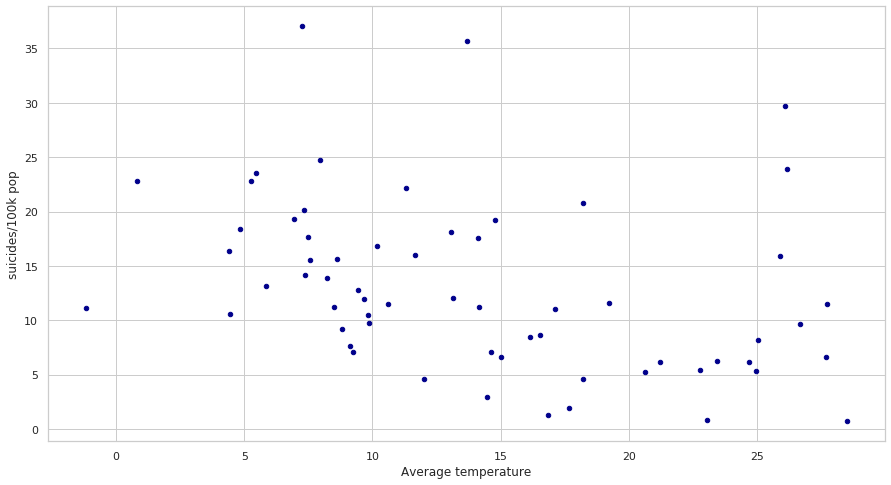

In [84]:
#Make a scatter plot of average temperature vs suicide rate
df_grouped.plot.scatter(x='aver',y='suicides/100k pop', c='DarkBlue', figsize=(15,8))
plt.xlabel('Average temperature')


There's a moderate negative correlation between average temperatures and suicide rates. That is, the suicide rates decrease as temperature increases. We can see that this relationship is no longer after about 25C. After 25C, the suicide rates increase again.

In [87]:
df_grouped_no_outlier = df_grouped[df_grouped['aver']<25]

In [88]:
df_grouped_no_outlier.corr(method='pearson')

,suicides/100k pop,aver
suicides/100k pop,1.000000,-0.510708
aver,-0.510708,1.000000


As you can see, the correlation is significantly stronger if temperatures above 25C are taken out of the data, confirming the change in relationship at 25C.